In [1]:
#for data manipulations
import numpy as np
import pandas as pd

#for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

#for interactivity 
from ipywidgets import interact

## Exploratory Analysis

In [2]:
# to read dataset

data=pd.read_csv("data.csv")

In [5]:
# check the shape of the dataset
print("Shape of the dataset : ",data.shape)

Shape of the dataset :  (2200, 8)


In [6]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [10]:
# to check missing value

data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

### If missing Values
- fillna function is used to replace these missing values with statistical values such as: Mean , Median or Mode
- Mean =   used when the column contains numerical data
- Median = used when the column contains data with outliers
- Mode  =  used when the column contains categorical data

- pandas have two functions such as fillna and dropna to treat missing values

In [14]:
# to check the crops present in the dataset

data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [22]:
data.describe()
mean=data.describe()

In [24]:
# it gives us the minimum requirements of the soil and climate
mean.loc["mean"]  

N               50.551818
P               53.362727
K               48.149091
temperature     25.616244
humidity        71.481779
ph               6.469480
rainfall       103.463655
Name: mean, dtype: float64

In [53]:
# lets the check summary statistics for each of the crops
@interact
def summary(crops=list(data['label'].value_counts().index)):
    x=data[data['label']==crops]   # having all labels
    print("Statistics for Nitrogen ")
    print("Minimum Nitrogen required : ",x['N'].min())
    print("Average Nitrogen required : ",x['N'].mean())
    print("Maximum Nitrogen required : ",x['N'].max())
    print("----------------------------")
    print("Statistics for Phosphorous ")
    print("Minimum Phosphorous required : ",x['P'].min())
    print("Average Phosphorous required : ",x['P'].mean())
    print("Maximum Phosphorous required : ",x['P'].max())
    print("----------------------------")
    print("Statistics for Potassium ")
    print("Minimum Potassium required : ",x['K'].min())
    print("Average Potassium required : ",x['K'].mean())
    print("Maximum Potassium required : ",x['K'].max())
    print("----------------------------")
    print("Statistics for Temperature ")
    print("Minimum Temperature required : ",x['temperature'].min())
    print("Average Temperature required : ",x['temperature'].mean())
    print("Maximum Temperature required : ",x['temperature'].max())
    print("----------------------------")
    print("Statistics for Humidity ")
    print("Minimum Humidity required : ",x['humidity'].min())
    print("Average Humidity required : ",x['humidity'].mean())
    print("Maximum Humidity required : ",x['humidity'].max())
    print("----------------------------")
    print("Statistics for PH ")
    print("Minimum PH required : ",x['ph'].min())
    print("Average PH required : ",x['ph'].mean())
    print("Maximum PH required : ",x['ph'].max())
    print("----------------------------")
    print("Statistics for Rainfall ")
    print("Minimum rainfall required : ",x['rainfall'].min())
    print("Average rainfall required : ",x['rainfall'].mean())
    print("Maximum rainfall required : ",x['rainfall'].max())
    print("----------------------------")
    
    
    
    
    
    

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [69]:
data['label'].value_counts().index

Index(['rice', 'maize', 'jute', 'cotton', 'coconut', 'papaya', 'orange',
       'apple', 'muskmelon', 'watermelon', 'grapes', 'mango', 'banana',
       'pomegranate', 'lentil', 'blackgram', 'mungbean', 'mothbeans',
       'pigeonpeas', 'kidneybeans', 'chickpea', 'coffee'],
      dtype='object')

In [81]:
@interact
def compare(conditions=["N","P","K","temperature","ph","humidity","rainfall"]):
    print("Average vlaue for",conditions,"is {:0.2f}".format(data[conditions].mean()))
    print("------------------------------------------")
    print("Rice : {:.2f}".format(data[(data['label']=="rice")][conditions].mean()))
    print("Maize : {:.2f}".format(data[data['label']=='maize'][conditions].mean()))
    print("Jute : {:.2f}".format(data[data['label']=='jute'][conditions].mean()))
    print("Cotton : {:.2f}".format(data[data['label']=='cotton'][conditions].mean()))
    print("Coconut : {:.2f}".format(data[data['label']=='coconut'][conditions].mean()))
    print("Papaya : {:.2f}".format(data[data['label']=="papaya"][conditions].mean()))
    print("Orange : {:.2f}".format(data[data['label']=='orange'][conditions].mean()))
    print("Apple : {:.2f}".format(data[data['label']=='apple'][conditions].mean()))
    print("Muskmelon : {:.2f}".format(data[data['label']=='muskmelon'][conditions].mean()))
    print("Watermelon : {:.2f}".format(data[data['label']=='watermelon'][conditions].mean()))
    print("Grapes : {:.2f}".format(data[data['label']=='grapes'][conditions].mean()))
    print("Mango : {:.2f}".format(data[data['label']=='mango'][conditions].mean()))
    print("Banana : {:.2f}".format(data[data['label']=='banana'][conditions].mean()))
    print("Pomegranate : {:.2f}".format(data[data['label']=='pomegranate'][conditions].mean()))
    print("Lentil : {:.2f}".format(data[data['label']=='lentil'][conditions].mean()))
    print("Blackgram : {:.2f}".format(data[data['label']=='blackgram'][conditions].mean()))
    print("Mungbean : {:.2f}".format(data[data['label']=='mungbean'][conditions].mean()))
    print("Mothbeans : {:.2f}".format(data[data['label']=='mothbeans'][conditions].mean()))
    print("Pigeopeas :{:.2f}".format(data[data['label']=='pigeonpeas'][conditions].mean()))
    print("Kidneybeans :{:.2f}".format(data[data['label']=='kidneybeans'][conditions].mean()))
    print("Chickpea : {:.2f}".format(data[data['label']=='chickpea'][conditions].mean()))
    print("Coffee : {:.2f}".format(data[data['label']=='coffee'][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [88]:
@interact

def compare(conditions=['N','P','K','temperature','ph','humidity','rainfall']):
    print("Crops which require greater than average ",conditions,'\n')
    print(data[data[conditions]>data[conditions].mean()]['label'].unique())
    print("Crops which requre less than average",conditions,"\n")
    print(data[data[conditions]<data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

C:\Users\umair\anaconda3\envs\homework_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\umair\anaconda3\envs\homework_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\umair\anaconda3\envs\homework_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

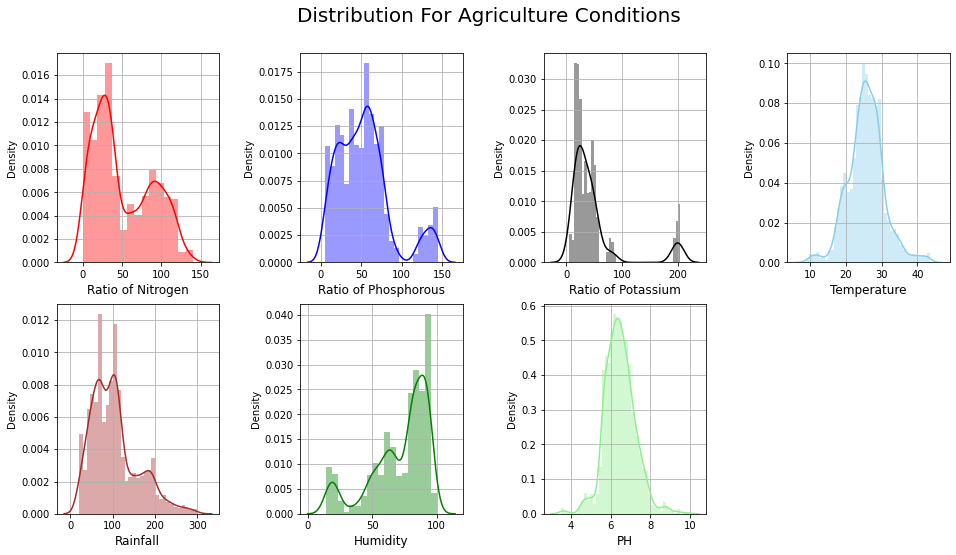

In [153]:
fig = plt.figure(figsize=(16,8))
plt.subplots_adjust(left=0.125, bottom= 0.1 , right=0.9, top=0.9, wspace=0.5, hspace=0.2)

plt.suptitle("Distribution For Agriculture Conditions",fontsize=20)

plt.subplot(2,4,1)
sns.distplot(data['N'],color='r')
plt.xlabel("Ratio of Nitrogen",fontsize=12)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(data['P'],color='b')
plt.xlabel("Ratio of Phosphorous",fontsize=12)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(data['K'],color='black')
plt.xlabel("Ratio of Potassium",fontsize=12)
plt.grid()

plt.subplot(2,4,4)
sns.distplot(data['temperature'],color='skyblue')
plt.xlabel("Temperature",fontsize=12)
plt.grid()

plt.subplot(2,4,5)
sns.distplot(data['rainfall'],color='brown')
plt.xlabel("Rainfall",fontsize=12)
plt.grid()

plt.subplot(2,4,6)
sns.distplot(data['humidity'],color='green')
plt.xlabel("Humidity",fontsize=12)
plt.grid()

plt.subplot(2,4,7)
sns.distplot(data['ph'],color='lightgreen')
plt.xlabel("PH",fontsize=12)
plt.grid()

In [173]:
print("Some Interesting Patterns")
print("-------------------------")
print("Crops which require very high ratio of Nitrogen content in soil: ",data[data['N']>120]['label'].unique())
print("Crops which require very high ratio of Phosphorous content in soil: ",data[data['P']>100]['label'].unique())
print("Crops which require very high ratio of Potassium content in the soil: ",data[data['K']>200]['label'].unique())
print("Crops which require very high ratio of Rainfall: ",data[data['rainfall']>200]['label'].unique())
print("Crops which require very low temperature: ",data[data['temperature']<10]['label'].unique())
print("Crops which require very high temperature: ",data[data['temperature']>40]['label'].unique())
print("Crops which require very low humidity: ",data[data['humidity']<20]['label'].unique())
print("Crops which require very high humidity: ",data[data['humidity']>90]['label'].unique())
print("Crops which require very low ph: ",data[data['ph']<4]['label'].unique())
print("Crops which require very high ph: ",data[data['ph']>9]['label'].unique())

Some Interesting Patterns
-------------------------
Crops which require very high ratio of Nitrogen content in soil:  ['cotton']
Crops which require very high ratio of Phosphorous content in soil:  ['grapes' 'apple']
Crops which require very high ratio of Potassium content in the soil:  ['grapes' 'apple']
Crops which require very high ratio of Rainfall:  ['rice' 'papaya' 'coconut']
Crops which require very low temperature:  ['grapes']
Crops which require very high temperature:  ['grapes' 'papaya']
Crops which require very low humidity:  ['chickpea' 'kidneybeans']
Crops which require very high humidity:  ['pomegranate' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut']
Crops which require very low ph:  ['mothbeans']
Crops which require very high ph:  ['mothbeans']


In [184]:
# lets understand which crops can only be grown in summer, winter and rainy seasons.

print("Summer Crops : ")
print(data[(data['temperature']>30) & (data['humidity']>50)]['label'].unique())
print("----------------")
print("Winter Crops : ")
print(data[(data['temperature']<20) & (data['humidity']>30)]['label'].unique())
print("----------------")
print("Rainy Crops : ")
print(data[(data['rainfall']>200) & (data['humidity']>30)]['label'].unique())

Summer Crops : 
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
----------------
Winter Crops : 
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
----------------
Rainy Crops : 
['rice' 'papaya' 'coconut']


## Clustering Analysis